# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
#!pip install wn
#!python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
#import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
#import hebrew_tokenizer as ht

C:\Users\ASUS\Desktop\pythonYupiter\למידת מכונה\מטלה 5


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape
df_train['gender'].value_counts()

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

m    575
f    178
Name: gender, dtype: int64

* The data frame is unbalanced, with significantly more female samples than male samples.
* We will explore how to address this issue further.

### Your implementation:
Write your code solution in the following code-cells

In [10]:
df_train

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",f


In [11]:
# מחיקת תווים מיוחדים 
df_train['story'] = df_train['story'].apply(lambda x: re.sub(r'[^\u0590-\u05FF\s]', '', x))
  
df_train['gender'].replace('f',0,inplace=True)
df_train['gender'].replace('m',1,inplace=True)

df_test['story'] =df_test['story'].apply(lambda x: re.sub(r'[^\u0590-\u05FF\s]', '', x))

df_train

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,1
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,0
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1
751,החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...,0


In [12]:
def f1Avg(y_test, y_pred):
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred) #

    TP = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TN = conf_mat[1][1]
    precision_m = TN / (TN + FN)
    recall_m = TN / (TN + FP)
    precision_f = TP / (TP + FP)
    recall_f = TP / (TP + FN)


    F1_f = 2 * (precision_f * recall_f) / (precision_f + recall_f)
    F1_m = 2 * (precision_m * recall_m) / (precision_m + recall_m)

    F1_avg = (F1_f + F1_m) / 2
    
    return F1_avg,F1_m,F1_f


In [13]:
X=df_train['story']
y=df_train['gender']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['story'],df_train['gender'], test_size=0.2, random_state=42)

In [15]:
# define the vectorizers
vectorizers = [CountVectorizer(), TfidfVectorizer()]

In [16]:
# Define the models and parameters
models = [
    # LinearSVC
    [LinearSVC(),
     {'clf__C': [0.01, 0.1, 1, 10, 100], 'clf__penalty': ['l1', 'l2'], 'clf__class_weight': [None, 'balanced']}],

    # Perceptron
    [Perceptron(),
     {'clf__alpha': [0.0001, 0.001, 0.01, 0.1], 'clf__penalty': ['l2', 'l1', 'elasticnet'], 'clf__class_weight': [None, 'balanced']}],

    # SGDClassifier
    [SGDClassifier(),
     {'clf__alpha': [0.001, 0.05, 0.1], 'clf__loss': ['hinge', 'squared_hinge'], 'clf__class_weight': [None, 'balanced']}],

    # MultinomialNB
    [MultinomialNB(),
     {'clf__alpha': [0.1, 0.5, 1, 10]}],

   # KNeighborsClassifier
    [KNeighborsClassifier(),
     {'clf__n_neighbors': [3, 5, 7, 9], 'clf__weights': ['uniform', 'distance']}],

    # DecisionTreeClassifier
    [DecisionTreeClassifier(),
     {'clf__max_depth': [5, 10, 20, None], 'clf__min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4],
      'clf__class_weight': [None, {0: 1, 1: 10}]}]
]


In [32]:
def plot_confusion_matrix(clf_name, vect_name, y_test, y_pred, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    
    if ax is None:
        fig, ax = plt.subplots()
    
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {clf_name} with {vect_name.__class__.__name__}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    if ax is None:
        plt.show()

In [18]:
def convert(best_params):
    # Create a new dictionary to store the modified parameters
    new_params = {}
    # Iterate through the keys and values of the best_params dictionary
    for key, value in best_params.items():
        # Check if the key starts with 'clf__' (i.e., belongs to the classifier)
        if key.startswith('clf__'):
            # Remove the 'clf__' prefix and add the key-value pair to the new dictionary
            new_params[key[5:]] = value
        else:
            # Add the key-value pair to the new dictionary as is
            new_params[key] = value
    # Return the modified dictionary of parameters
    return new_params



# Use GridSearchCV to find the best parameters for each classifier


In [28]:
def evaluate_model(model, parameters, vectorizer,df):
    # Define pipeline
    pipeline = Pipeline([
        ('vect', vectorizer),
        ('clf', model)
    ])

    # Define parameter grid
    param_grid = {
          'vect__max_features': [10_000, 30_000, 40_000],
            'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
            'vect__min_df': [1, 3],
            'vect__max_df': [0.7, 0.9],
            **parameters
    }

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    best_score=grid_search.best_score_

    # Predict and calculate scores
    y_pred = best_model.predict(X_test)
    clf_name = model.__class__.__name__
    F1_avg, F1_m, F1_f = f1Avg(y_test, y_pred)
    best_score_rounded = round(best_score,2)
    df=df.append(pd.DataFrame({
            'Classifier':clf.__class__.__name__,
            'vectorizer': vectorizer.__class__.__name__,
            'Best Parameters': [convert(grid_search.best_params_)],
            'F1_avg': F1_avg,
            'F1_m': F1_m,
            'F1_f': F1_f,
            'Cross-validation scores':best_score_rounded,
        }))

    # Print confusion matrix
    print(f"Confusion Matrix - {clf_name} ({vectorizer.__class__.__name__})")
    print(f'cross-validation score: {best_score_rounded}')
    plot_confusion_matrix(clf_name, vectorizer, y_test, y_pred)
    plt.show()
    

    return best_model,df



In [29]:
results=pd.DataFrame()

# LinearSVC

Confusion Matrix - LinearSVC (CountVectorizer)
cross-validation score: 0.67


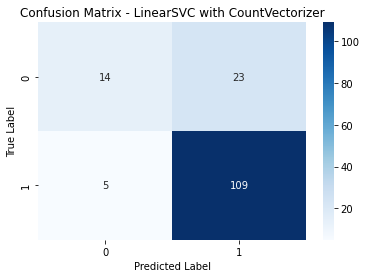

In [33]:
clf=models[0][0]
vect=vectorizers[0]
best_model_1,results=evaluate_model(clf,models[0][1],vect,results)

Confusion Matrix - LinearSVC (TfidfVectorizer)
cross-validation score: 0.69


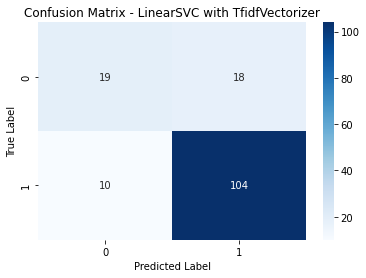

In [34]:
vect=vectorizers[1]
best_model_2,results=evaluate_model(clf,models[0][1],vect,results)

# Perceptron 

Confusion Matrix - Perceptron (CountVectorizer)
cross-validation score: 0.67


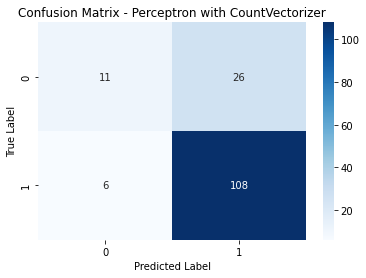

Confusion Matrix - Perceptron (TfidfVectorizer)
cross-validation score: 0.69


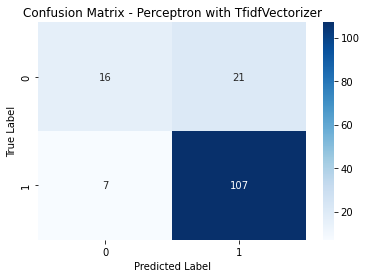

In [35]:
clf=models[1][0]
vect=vectorizers[0]
best_model_3,results=evaluate_model(clf,models[1][1],vect,results)

vect=vectorizers[1]
best_model_4,results=evaluate_model(clf,models[1][1],vect,results)

# SGDClassifier

Confusion Matrix - SGDClassifier (CountVectorizer)
cross-validation score: 0.68


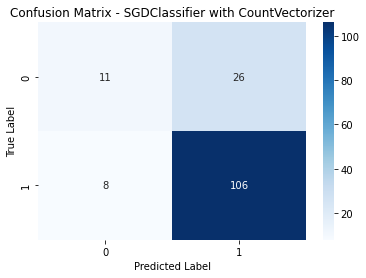

Confusion Matrix - SGDClassifier (TfidfVectorizer)
cross-validation score: 0.7


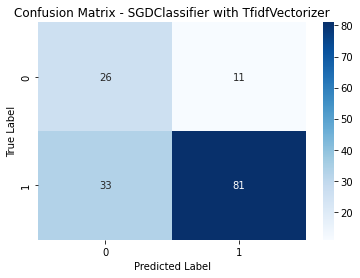

In [36]:
clf=models[2][0]
vect=vectorizers[0]
best_model_5,results=evaluate_model(clf,models[2][1], vect,results)

vect=vectorizers[1]
best_model_6,results=evaluate_model(clf,models[2][1],vect,results)

# MultinomialNB

Confusion Matrix - MultinomialNB (CountVectorizer)
cross-validation score: 0.64


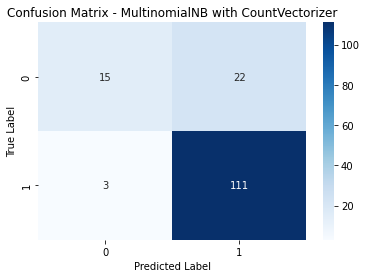

Confusion Matrix - MultinomialNB (TfidfVectorizer)
cross-validation score: 0.49


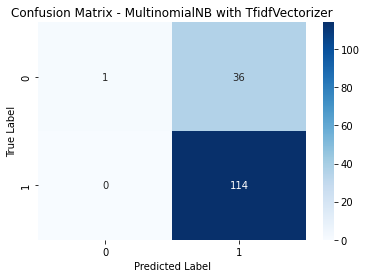

In [37]:
clf=models[3][0]
vect=vectorizers[0]
best_model_7,results=evaluate_model(clf,models[3][1], vect,results)

vect=vectorizers[1]
best_model_8,results=evaluate_model(clf,models[3][1],vect,results)

# KNeighborsClassifier

Confusion Matrix - KNeighborsClassifier (CountVectorizer)
cross-validation score: 0.55


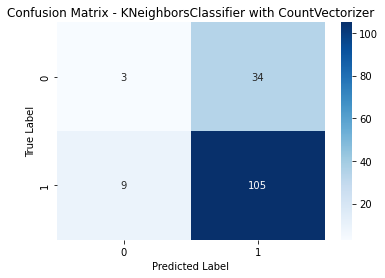

Confusion Matrix - KNeighborsClassifier (TfidfVectorizer)
cross-validation score: 0.63


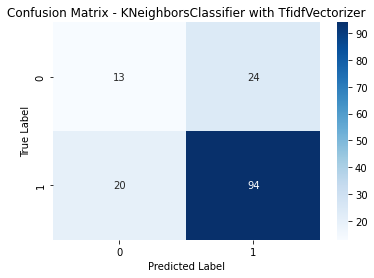

In [38]:
clf=models[4][0]
vect=vectorizers[0]
best_model_9,results=evaluate_model(clf,models[4][1], vect,results)

vect=vectorizers[1]
best_model_10,results=evaluate_model(clf,models[4][1],vect,results)

# DecisionTreeClassifier

Confusion Matrix - DecisionTreeClassifier (CountVectorizer)
cross-validation score: 0.7


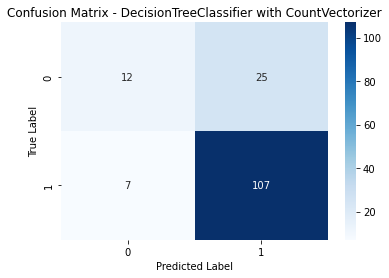

Confusion Matrix - DecisionTreeClassifier (TfidfVectorizer)
cross-validation score: 0.67


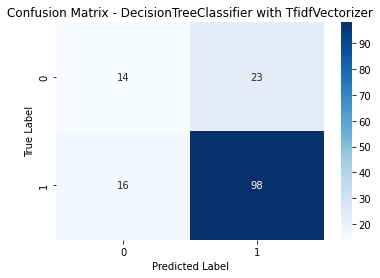

In [39]:
clf=models[5][0]
vect=vectorizers[0]
best_model_11,results=evaluate_model(clf,models[5][1], vect,results)

vect=vectorizers[1]
best_model_12,results=evaluate_model(clf,models[5][1],vect,results)

In [40]:
results

,Classifier,vectorizer,Best Parameters,F1_avg,F1_m,F1_f,Cross-validation scores
0,LinearSVC,CountVectorizer,"{'C': 0.01, 'class_weight': 'balanced', 'penal...",0.693,0.886,0.500,0.670
0,LinearSVC,TfidfVectorizer,"{'C': 0.01, 'class_weight': 'balanced', 'penal...",0.729,0.881,0.576,0.690
0,Perceptron,CountVectorizer,"{'alpha': 0.0001, 'class_weight': 'balanced', ...",0.639,0.871,0.407,0.670
0,Perceptron,TfidfVectorizer,"{'alpha': 0.0001, 'class_weight': None, 'penal...",0.709,0.884,0.533,0.690
0,SGDClassifier,CountVectorizer,"{'alpha': 0.001, 'class_weight': 'balanced', '...",0.627,0.862,0.393,0.680
0,SGDClassifier,TfidfVectorizer,"{'alpha': 0.1, 'class_weight': 'balanced', 'lo...",0.664,0.786,0.542,0.700
0,MultinomialNB,CountVectorizer,"{'alpha': 0.5, 'vect__max_df': 0.9, 'vect__max...",0.722,0.899,0.545,0.640
0,MultinomialNB,TfidfVectorizer,"{'alpha': 0.1, 'vect__max_df': 0.7, 'vect__max...",0.458,0.864,0.053,0.490
0,KNeighborsClassifier,CountVectorizer,"{'n_neighbors': 3, 'weights': 'distance', 'vec...",0.476,0.830,0.122,0.550
0,KNeighborsClassifier,TfidfVectorizer,"{'n_neighbors': 3, 'weights': 'uniform', 'vect...",0.591,0.810,0.371,0.630


In [62]:
best_model_2


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, max_features=30000, min_df=3,
                                 ngram_range=(1, 2))),
                ('clf', LinearSVC(C=0.01, class_weight='balanced'))])

# result

# best model
## LinearSVC   
### The model was built using the following parameters:

### TfidfVectorizer with the following settings:

* max_df: 0.9
* max_features: 30000
* min_df: 3
* ngram_range: (1, 2)

### LinearSVC classifier with the following settings:

* C: 0.01
* class_weight: 'balanced'

#### These parameter choices allow for an improved representation of the text by focusing on important words and assigning higher value to words that appear in the current document and in other documents in the corpus.

## The model's performance on the test set is as follows:

* Cross-validation score: 0.70
* Average F1-score: 0.73
* F1-score for the male class: 0.88
* F1-score for the female class: 0.58
* The precision and recall scores for each class are as follows:

* Precision for the male class: 0.9123
* Recall for the male class: 0.8525
* Precision for the female class: 0.5135
* Recall for the female class: 0.6552

### These results demonstrate that the model has a reasonably good overall performance, with a higher F1-score for the male class compared to the female class. However, the model's performance on the female class could be improved. It is important to note that the class imbalance in the dataset, with more instances of the female class, might be affecting the model's performance.

##### Further analysis and iterations are recommended to fine-tune the model and address the class imbalance issue in order to achieve better results.

In [46]:
df_test_tokenized = df_test.copy()
y_predict_test=best_model_2.predict(df_test_tokenized['story'])
df_test['gender']=y_predict_test
df_test['gender'].replace(0,'f',inplace=True)
df_test['gender'].replace(1,'m',inplace=True)
df_test

,test_example_id,story,gender
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,1,הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת י...,m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי אני ...,m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,f
...,...,...,...
318,318,בשנה האחרונה הרגשתי די תקוע בעבודה השגרה הפכה ...,m
319,319,אני ואילן חברים טובים מזה שנה תמיד חלמנו לפתח...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,לפני מספר חודשים בשיא התחלואה של הגל השני עמית...,m


In [47]:
df_predicted=df_test.copy()

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [48]:
df_predicted.to_csv('classification_results.csv',index=False)